#Importing Libraries


Predefined libraries need to be imported to perform the data preprocessing -

**numpy** for handling numbers

**pandas** for handling the dataset


**SimpleImputer** for handling missing values in the dataset


**LabelEncoder** and **OneHotEncoder** for encoding categorical data


**matplotlib** for data visulaisation

**train_test_split** to split train data and test data from the dataset

**Standard Scaler** to standardize the dataset in feature scaling


In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Importing the dataset



In [ ]:
dataset = pd.read_csv('avocado.csv')
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
dataset.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

#Data Cleaning

**Checking the missing values in the dataset:**






In [ ]:
print(round(dataset.isna().mean()*100,2))

Unnamed: 0      0.0
Date            0.0
AveragePrice    0.0
Total Volume    0.0
4046            0.0
4225            0.0
4770            0.0
Total Bags      0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
type            0.0
year            0.0
region          0.0
dtype: float64


**Inference:** There are no missing values in the dataset.

**Dropping unwanted columns in the dataset:**

In [ ]:
dataset=dataset.drop(dataset.columns[0],axis=1)
dataset=dataset.drop(columns=['Total Volume','Total Bags'],axis=1)
dataset.head()

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany


#Identifying Categorical Values


In [ ]:
cat_features = dataset.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:", cat_features)


Categorical Features: ['Date', 'type', 'region']


#Identifying Numerical Values

In [ ]:
num_features = dataset.select_dtypes(exclude=['object']).columns.tolist()
print("Numerical Features:", num_features)

Numerical Features: ['AveragePrice', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


#Exploratory Data Analysis

**#1 - What is the maximum value of the average price of avocado?**

Max Avg Price Value:  3.25


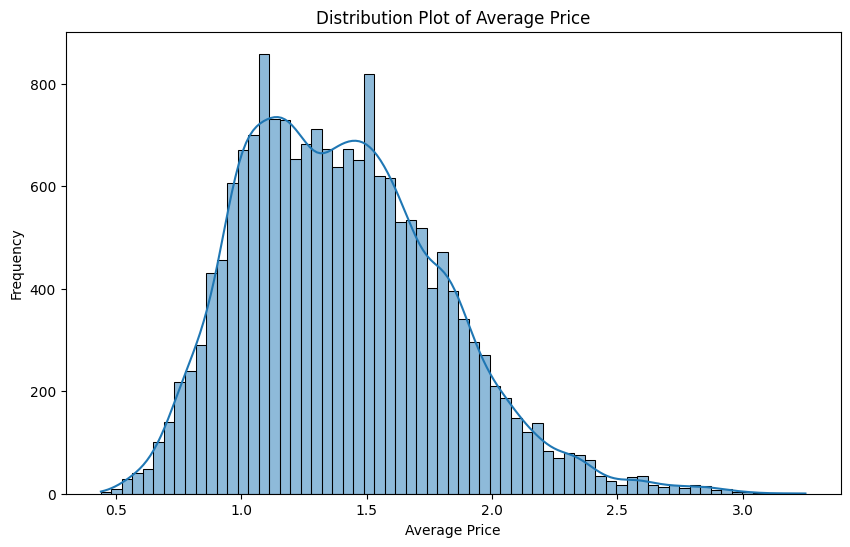

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(dataset['AveragePrice'],kde=True)
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.title('Distribution Plot of Average Price')
max_average_price = dataset['AveragePrice'].max()
print("Max Avg Price Value: " , max_average_price)
plt.show()

**#2 - Which year has the highest value of the average price of avocado?**

Max Price Year:  2016


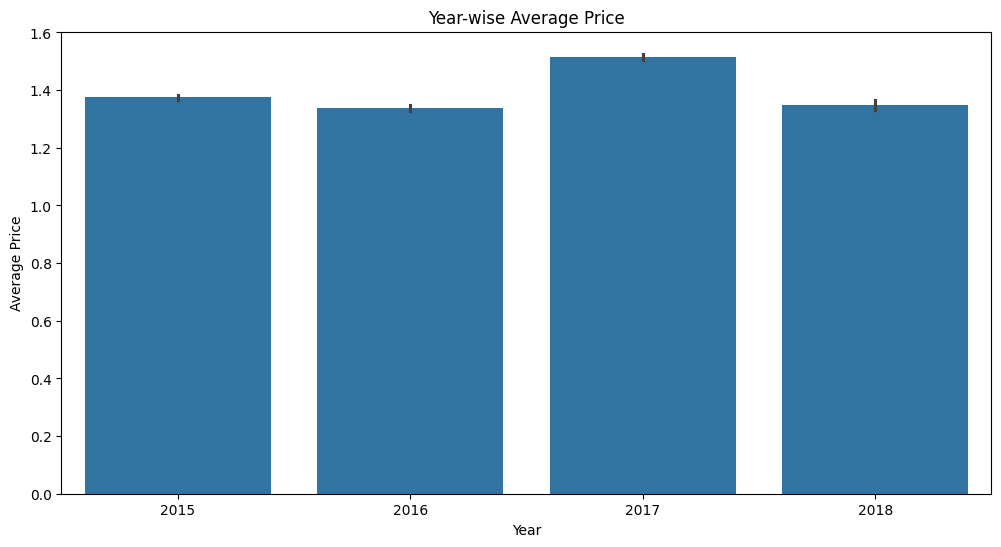

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='year',y='AveragePrice',data=dataset)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Year-wise Average Price')

max_price_year = dataset.loc[dataset['AveragePrice'].idxmax(),'year']
print("Max Price Year: ",max_price_year)

plt.show()

**#3 - Which region has the highest value of the average price of avocado?**

Max Price in Region:  SanFrancisco


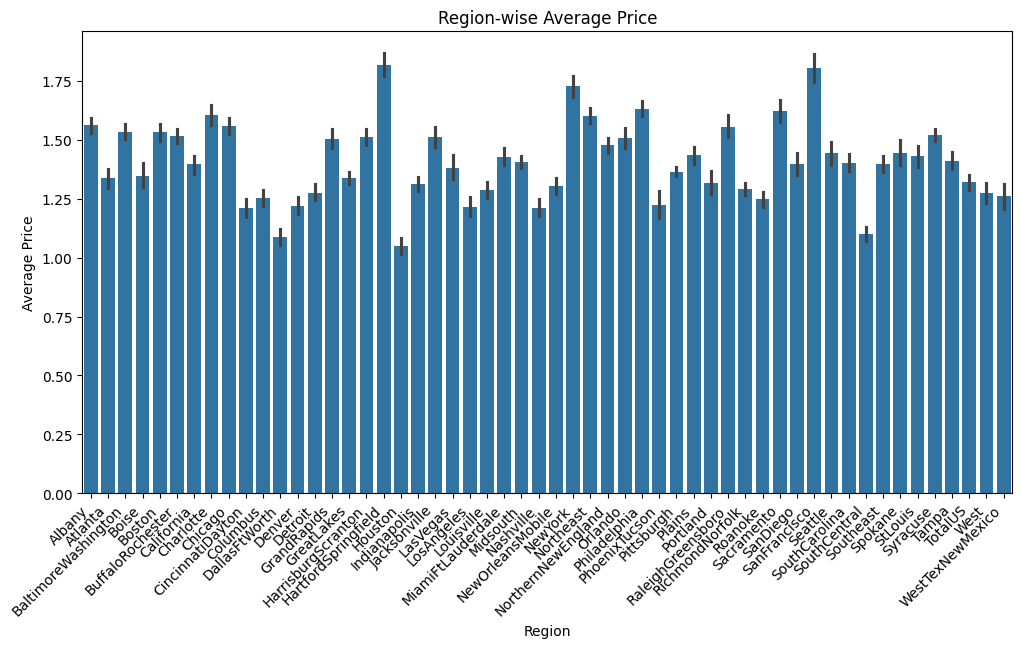

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='region',y='AveragePrice',data=dataset)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Region-wise Average Price')
plt.xticks(rotation=45, ha='right')

max_price_region = dataset.loc[dataset['AveragePrice'].idxmax(),'region']
print("Max Price in Region: ",max_price_region)

plt.show()

**#4 -Which date has the highest average price and what is the highest value of average price?**

Max Price on a Day:  2016-10-30


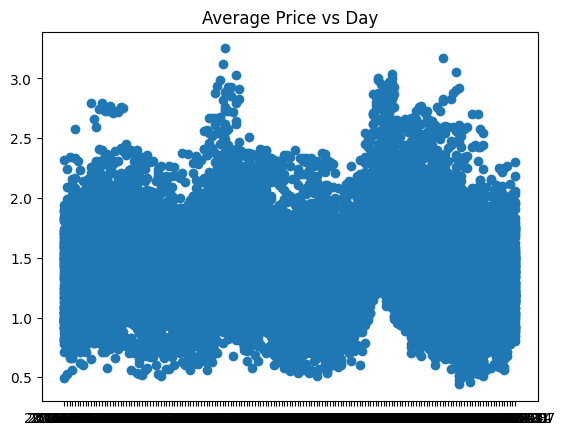

In [ ]:
plt.title("Average Price vs Day")
plt.scatter(dataset['Date'],dataset['AveragePrice'])
max_price_year = dataset.loc[dataset['AveragePrice'].idxmax(),'Date']
print("Max Price on a Day: ",max_price_year)
plt.show()

**#5 - Is there a correlation between the size of bags (Small Bags, Large Bags, XLarge Bags) and the average price of avocados?**

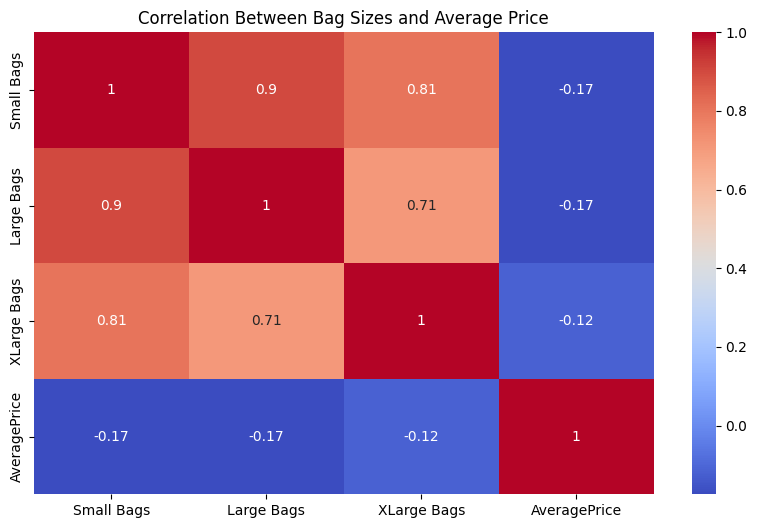

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataset[['Small Bags', 'Large Bags', 'XLarge Bags', 'AveragePrice']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Bag Sizes and Average Price')
plt.show()

#Handling Categorical Values

In [ ]:
dataset['type'].unique()

array(['conventional', 'organic'], dtype=object)

There are only 2 unique values for the type column - so label encoding can be used.

In [ ]:
dataset['type'] = LabelEncoder().fit_transform(dataset['type'])
dataset.head()

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,Albany
1,2015-12-20,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,Albany
2,2015-12-13,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,Albany
3,2015-12-06,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,Albany
4,2015-11-29,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,Albany


In [ ]:
dataset['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

One-hot encoding can be used for the 'region'column

In [ ]:
dataset = pd.get_dummies(dataset,columns = ['region'])
dataset.head()

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,2015-12-27,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,...,0,0,0,0,0,0,0,0,0,0
1,2015-12-20,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,...,0,0,0,0,0,0,0,0,0,0
2,2015-12-13,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,...,0,0,0,0,0,0,0,0,0,0
3,2015-12-06,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,...,0,0,0,0,0,0,0,0,0,0
4,2015-11-29,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,...,0,0,0,0,0,0,0,0,0,0



Handling the 'Date' column



In [ ]:
dataset['Date'] = pd.to_datetime(dataset['Date']).astype('int64')
dataset['Date'].head()

0    1451174400000000000
1    1450569600000000000
2    1449964800000000000
3    1449360000000000000
4    1448755200000000000
Name: Date, dtype: int64

#Handling Outliers



The values that are lesser than the lower_bound and higher than the upper_bound can be confirmed as outliers - and these values can be removed from the dataset for better reading of data from the dataset.

In [ ]:
dataset.shape

(18249, 64)

In [ ]:
print(num_features)

['AveragePrice', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


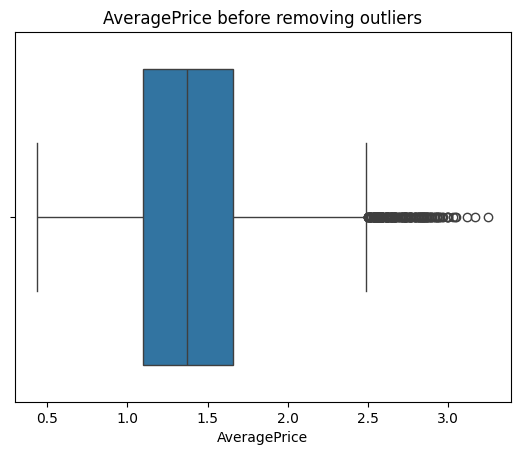

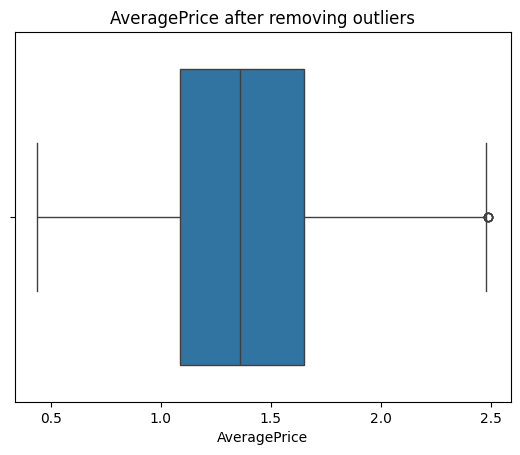

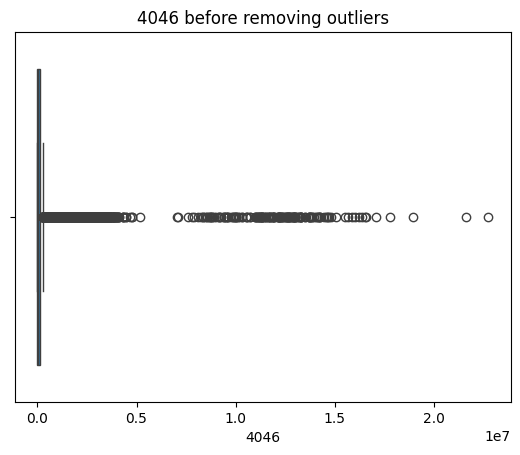

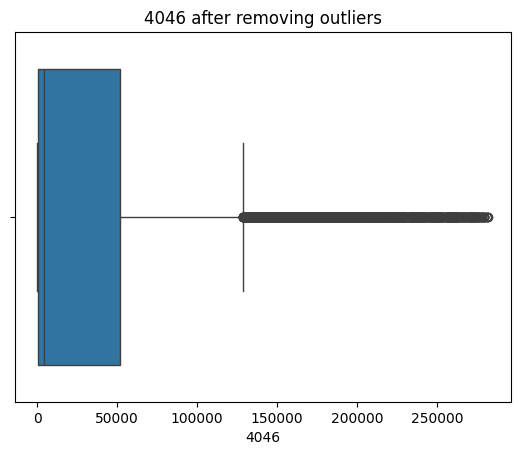

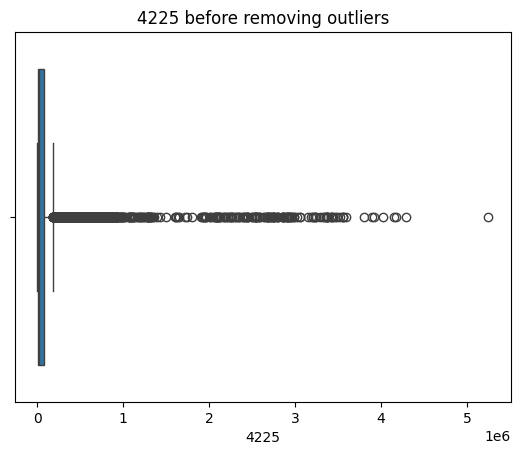

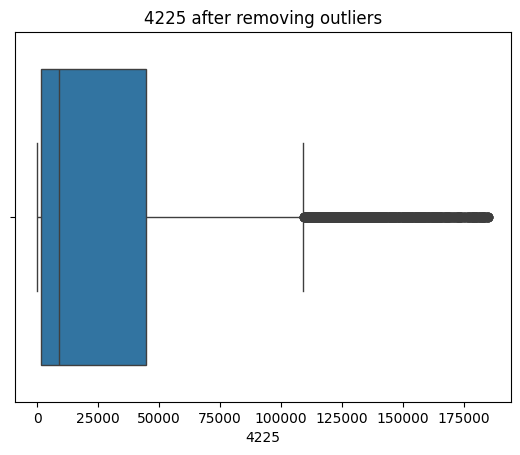

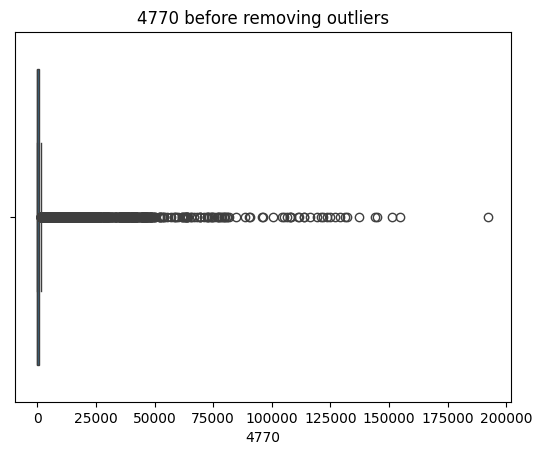

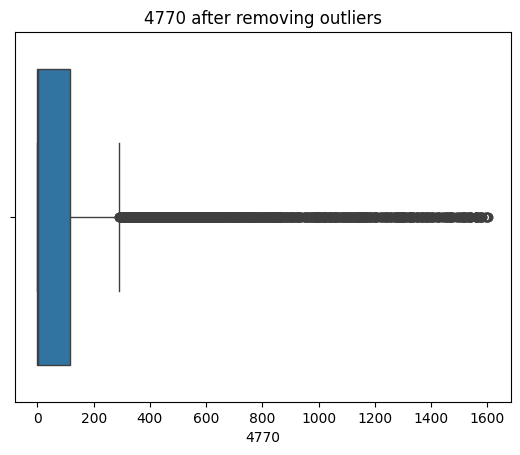

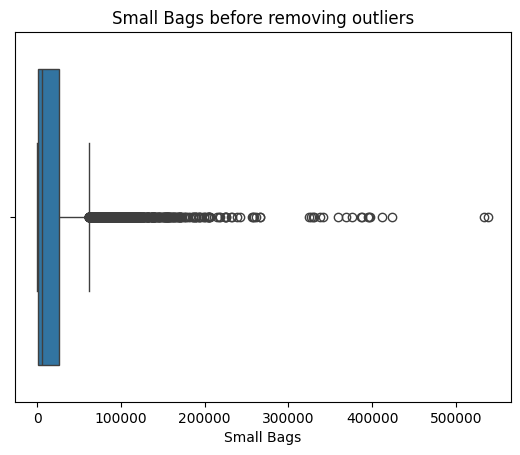

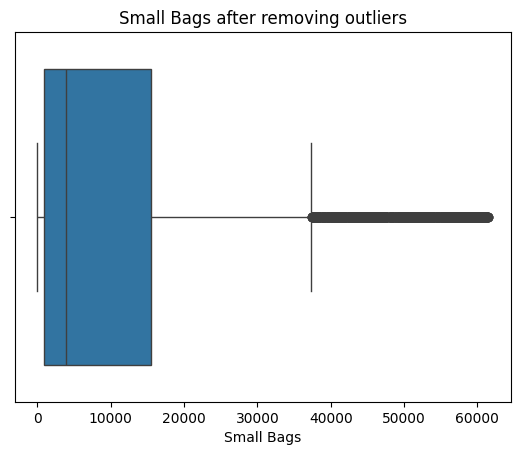

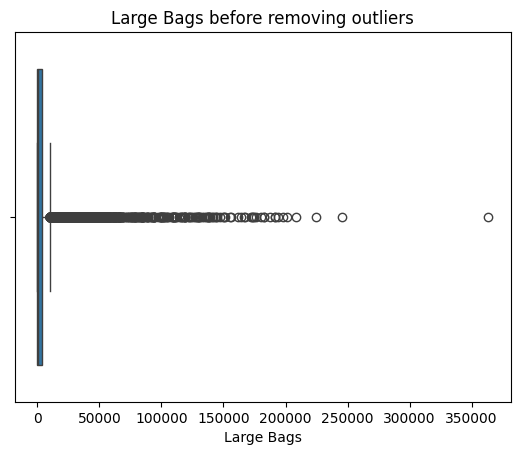

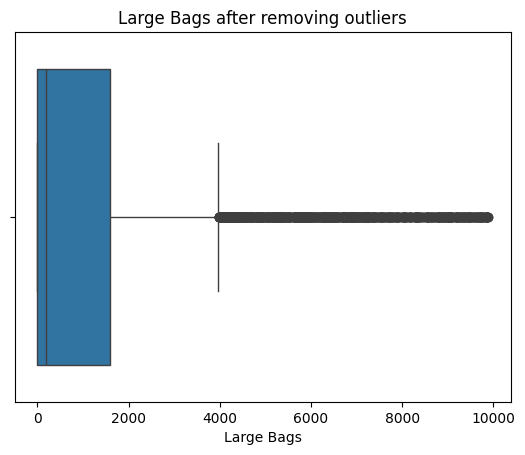

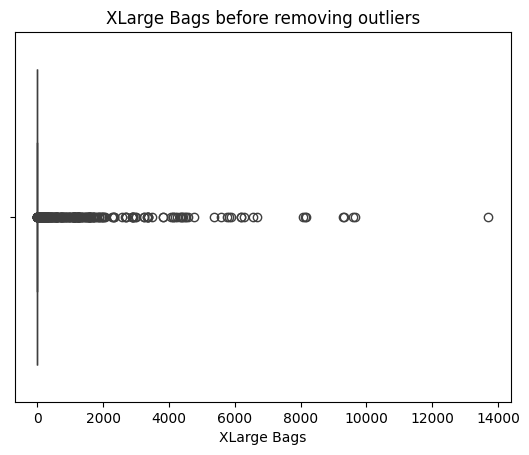

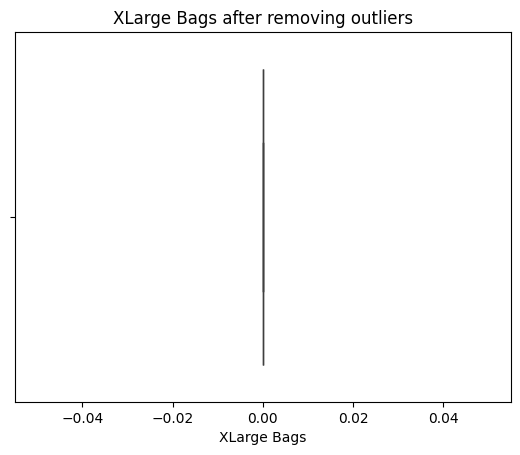

In [ ]:
num_features.remove('year')
for col in num_features:
  sns.boxplot(x=dataset[col])
  plt.title(col+" before removing outliers")
  plt.show()
  dataset[col].describe()
  Q1 = dataset[col].quantile(0.25)
  Q3 = dataset[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  dataset.drop(dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)].index, inplace=True)
  plt.title(col+" after removing outliers")
  sns.boxplot(x=dataset[col])
  plt.show()

In [ ]:
dataset.shape

(7878, 64)

#Distribution of features

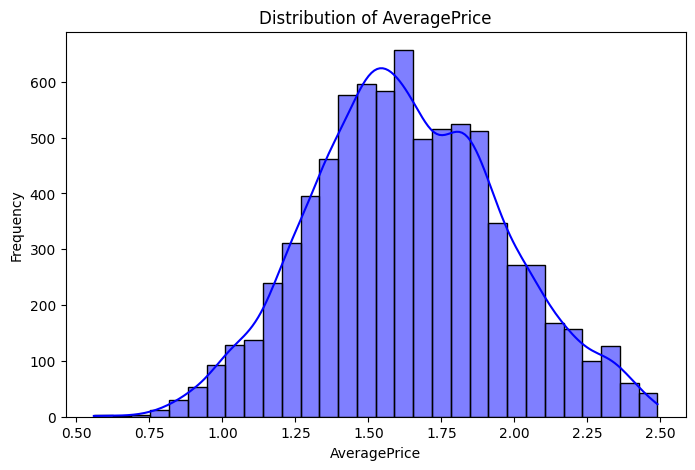

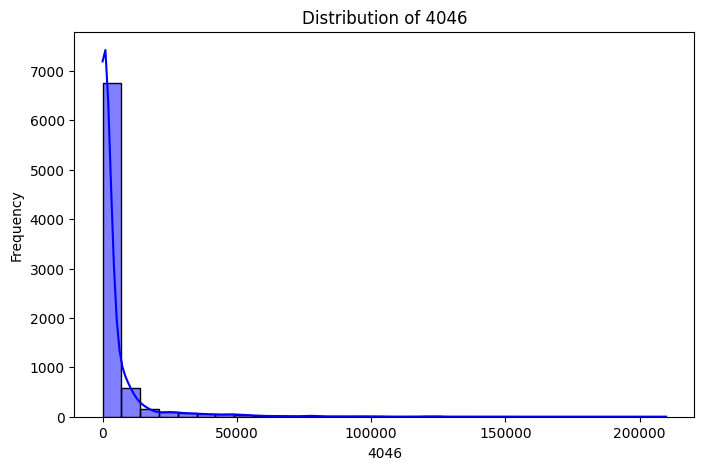

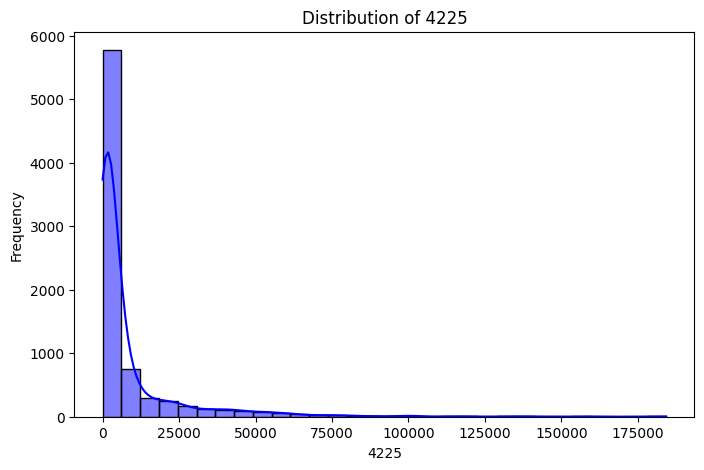

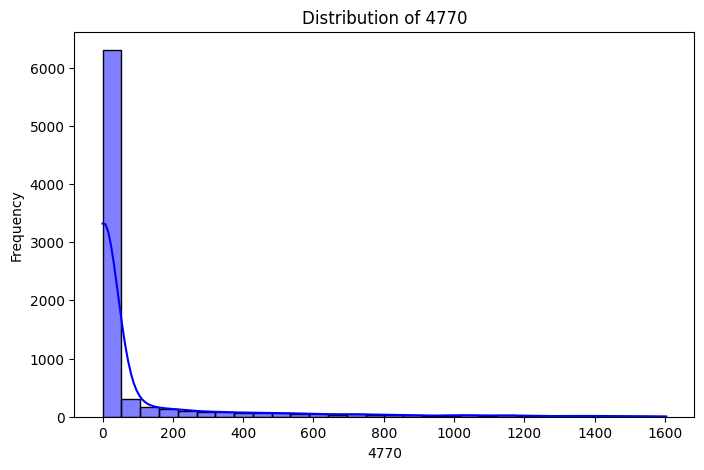

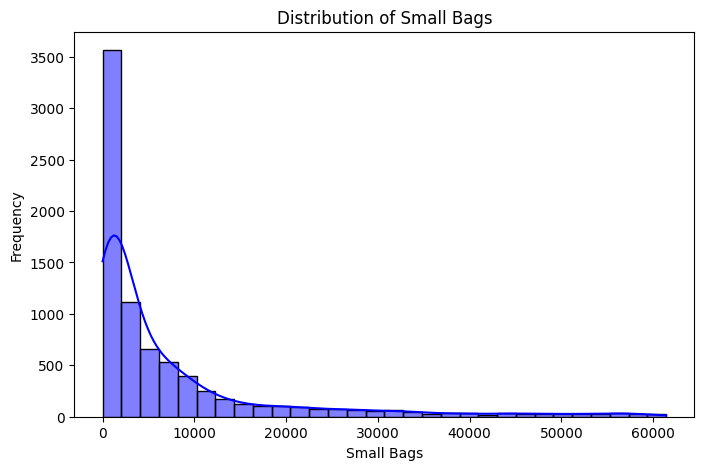

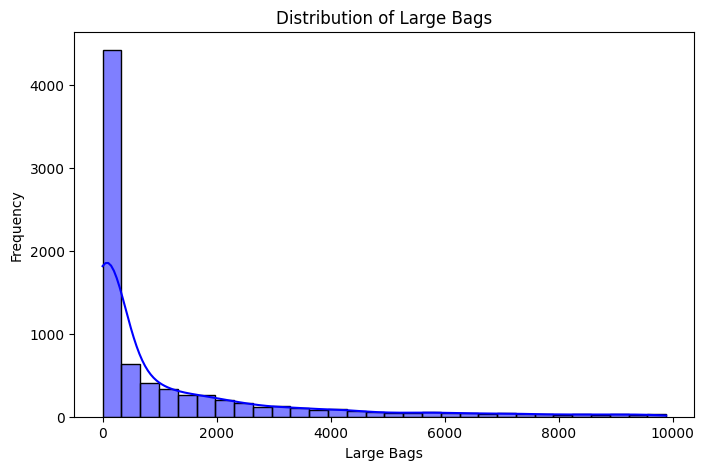

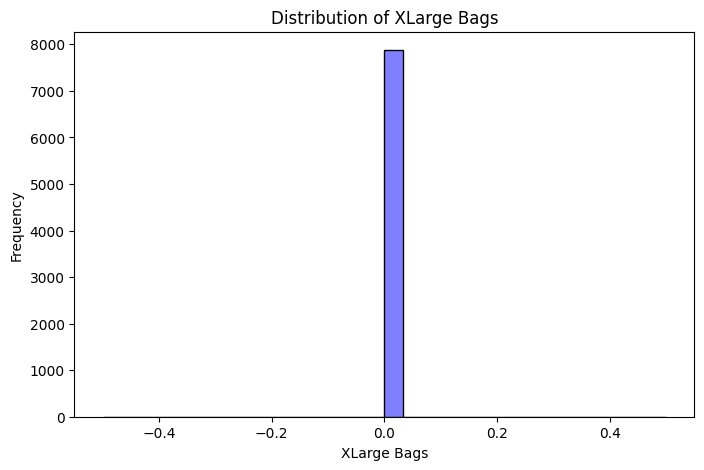

In [ ]:
for feature in num_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(dataset[feature], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
dataset.to_csv('avocado_processed.csv')

#Splitting the data

In [ ]:
X = dataset.drop(columns=['AveragePrice'],axis=1)
Y = dataset['AveragePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

#Feature Scaling

Standardization


In [ ]:
sc = StandardScaler()
X_train_standard = sc.fit_transform(X_train)
X_test_standard = sc.transform(X_test)

In [ ]:
print(X_train_standard)

[[-0.31197031 -0.32372585  1.43660862 ...  0.         -0.02182352
  -0.1410891 ]
 [ 0.93735617 -0.3363283  -0.48063069 ...  0.         -0.02182352
  -0.1410891 ]
 [ 0.81645361 -0.293516   -0.31012846 ...  0.         -0.02182352
  -0.1410891 ]
 ...
 [ 0.41344507 -0.31529382 -0.48677701 ...  0.         -0.02182352
  -0.1410891 ]
 [-0.69482842 -0.26924489  1.41830891 ...  0.         -0.02182352
  -0.1410891 ]
 [ 0.05073738 -0.33577905 -0.48306972 ...  0.         -0.02182352
  -0.1410891 ]]


In [ ]:
print(X_train_standard)

[[-0.31197031 -0.32372585  1.43660862 ...  0.         -0.02182352
  -0.1410891 ]
 [ 0.93735617 -0.3363283  -0.48063069 ...  0.         -0.02182352
  -0.1410891 ]
 [ 0.81645361 -0.293516   -0.31012846 ...  0.         -0.02182352
  -0.1410891 ]
 ...
 [ 0.41344507 -0.31529382 -0.48677701 ...  0.         -0.02182352
  -0.1410891 ]
 [-0.69482842 -0.26924489  1.41830891 ...  0.         -0.02182352
  -0.1410891 ]
 [ 0.05073738 -0.33577905 -0.48306972 ...  0.         -0.02182352
  -0.1410891 ]]


#Writing to csv

In [ ]:
X_train.to_csv("train.csv")
X_test=pd.DataFrame(X_test)
X_test.to_csv("test.csv")